In [13]:
import subprocess
import pandas as pd
import json
import datetime

# Load the CSV file
file_path = '/Users/solcheung/berkeley/research/emotional/data/CoP_parsed_sentences.csv'
df = pd.read_csv(file_path)

In [35]:
def classify_self_care(prev_sentence, curr_sentence, next_sentence, llama_version="llama3.2"):
    try:
        prompt = (
            f"Context:\n"
            f"Previous Sentence: \"{prev_sentence}\"\n"
            f"Current Sentence: \"{curr_sentence}\"\n"
            f"Next Sentence: \"{next_sentence}\"\n\n"
            "Question: Given the following sentences, is the current sentence related to self-care?\n"
            "Answer with lowercase 'yes' or 'no' and a percentage confidence (with %) on how confident you are in this answer.\n"
            "Please be realistic with your decision and confidence level.\n"
            "Give answer in an array of 2 elements (answer to the question and your confidence in your answer) and don't include anything else:\n"
            "1. {your answer}, {your confidence}\n"
            "DO NOT INCLUDE ANY EXTRA INFORMATION"
        )

        # Use Ollama to generate a response
        command = f'ollama run {llama_version}'
        result = subprocess.run(command, input=prompt, shell=True, capture_output=True, text=True)
        
        # Extract the output
        output = result.stdout.strip()
        print("Output: ", output)

        if not output:
            print(f"No output for sentence: '{curr_sentence}'")
            return "error", "error"

        output = output.replace("{", "").replace("}", "").strip()
        parts = output.split(", ")
        if len(parts) == 2:
            answer = parts[0].strip()
            confidence = parts[1].replace("%", "").strip()
            return answer, confidence
        else:
            print(f"Unexpected output format for sentence: '{curr_sentence}'\nOutput: {output}")
            return "error", "error"

    except Exception as e:
        print(f"Exception occurred while classifying sentence: '{curr_sentence}'\nException: {e}")
        return "error", "error"

"""

# Apply the classifier function to each sentence in the dataframe
if 'Sentence' in df.columns:
    # Make sure classify_self_care always returns a tuple of two elements
    df[['Self Care', 'Self Care Confidence']] = df['Sentence'].apply(lambda x: pd.Series(classify_self_care(x)))
else:
    print("Error: The CSV file does not have a 'Sentence' column.")

# Generate unique filename with timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f"/Users/solcheung/berkeley/research/emotional/llama_output/llama_output_{timestamp}.csv"
df.to_csv(output_file, index=False)

print(f"Classification complete. Results saved to {output_file}.")
"""


'\n\n# Apply the classifier function to each sentence in the dataframe\nif \'Sentence\' in df.columns:\n    # Make sure classify_self_care always returns a tuple of two elements\n    df[[\'Self Care\', \'Self Care Confidence\']] = df[\'Sentence\'].apply(lambda x: pd.Series(classify_self_care(x)))\nelse:\n    print("Error: The CSV file does not have a \'Sentence\' column.")\n\n# Generate unique filename with timestamp\ntimestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")\noutput_file = f"/Users/solcheung/berkeley/research/emotional/llama_output/llama_output_{timestamp}.csv"\ndf.to_csv(output_file, index=False)\n\nprint(f"Classification complete. Results saved to {output_file}.")\n'

In [36]:
if 'Sentence' in df.columns:
    results = []
    sentences = df['Sentence'].tolist()

    for i in range(len(sentences)):
        prev_sentence = sentences[i - 1] if i > 0 else "[Start of transcript]"
        curr_sentence = sentences[i]
        next_sentence = sentences[i + 1] if i < len(sentences) - 1 else "[End of transcript]"
        results.append(classify_self_care(prev_sentence, curr_sentence, next_sentence))

    df[['Self Care', 'Self Care Confidence']] = pd.DataFrame(results, columns=['Self Care', 'Self Care Confidence'])

    # === Save Results ===
    output_file = f"/Users/solcheung/berkeley/research/emotional/llama_output/llama_outputNew.csv"
    df.to_csv(output_file, index=False)

    print(f"Classification complete. Results saved to {output_file}.")
else:
    print("Error: The CSV file does not have a 'Sentence' column.")


Output:  {no, 70%}
Output:  {no, 30%}
Output:  {no, 60%}
Output:  {no, 60%}
Output:  {no, 20%}
Output:  {no, 10%}
Output:  {no, 20%}
Output:  {no, 30%}
Output:  {no, 60%}
Output:  {no, 40%}
Output:  {no, 20%}
Output:  {no, 20%}
Output:  {no, 60%}
Output:  {no, 10%}
Output:  {no, 20%}
Output:  {no, 20%}
Output:  {no, 20%}
Output:  {no, 20%}
Output:  {no, 30%}
Output:  {no, 30%}
Output:  {no, 30%}
Output:  {no, 20%}
Output:  {no, 20%}
Output:  {no, 40%}
Output:  {no, 10%}
Output:  {no, 20%}
Output:  {no, 70%}
Output:  {yes, 70%}
Output:  {no, 20%}
Output:  {no, 20%}
Output:  {no, 30%}
Output:  {no, 60%}
Output:  {no, 20%}
Output:  {no, 30%}
Output:  {no, 40%}
Output:  {no, 20%}
Output:  {no, 10%}
Output:  {no, 20%}
Output:  {no, 40%}
Output:  {no, 20%}
Output:  {no, 0%}
Output:  {no, 60%}
Output:  {no, 30%}
Output:  {no, 30%}
Output:  {no, 60%}
Output:  {no, 40%}
Output:  {no, 40%}
Output:  {no, 70%}
Output:  {no, 70%}
Output:  {no, 10%}
Output:  {no, 20%}
Output:  {no, 30%}
Output:  {no

<Figure size 600x400 with 0 Axes>

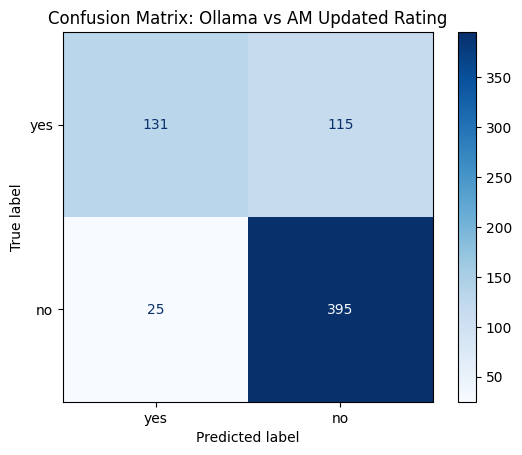

True Positives (TP): 395
False Positives (FP): 115
True Negatives (TN): 131
False Negatives (FN): 25

Accuracy:    0.79
Precision:   0.77
Recall:      0.94
Specificity: 0.53
F1 Score:    0.85


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# File paths
ollama_path = "llama_output/llama_output.csv"
validation_path = "llama_output/llama_output_AM_Rating_4.9.csv"

# Load CSVs
df_ollama = pd.read_csv(ollama_path)
df_val = pd.read_csv(validation_path)

# Clean and normalize values
df_ollama['Self Care'] = df_ollama['Self Care'].str.strip().str.lower()
df_val['AM Updated Rating'] = df_val['AM Updated Rating'].str.strip().str.upper()

# Map 'Y' to 'yes', 'N' to 'no'
df_val['True Label'] = df_val['AM Updated Rating'].map({'Y': 'yes', 'N': 'no'})

# Add Ollama predictions (assumes same order)
df_val['Ollama Prediction'] = df_ollama['Self Care']

# Drop rows with missing values in either label
df_eval = df_val.dropna(subset=['True Label', 'Ollama Prediction'])

# Extract cleaned labels
y_true = df_eval['True Label']
y_pred = df_eval['Ollama Prediction']

# Define class labels
labels = ['yes', 'no']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) else 0
recall = tp / (tp + fn) if (tp + fn) else 0
specificity = tn / (tn + fp) if (tn + fp) else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Ollama vs AM Updated Rating")
plt.show()

# Print evaluation metrics
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}\n")

print(f"Accuracy:    {accuracy:.2f}")
print(f"Precision:   {precision:.2f}")
print(f"Recall:      {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score:    {f1_score:.2f}")


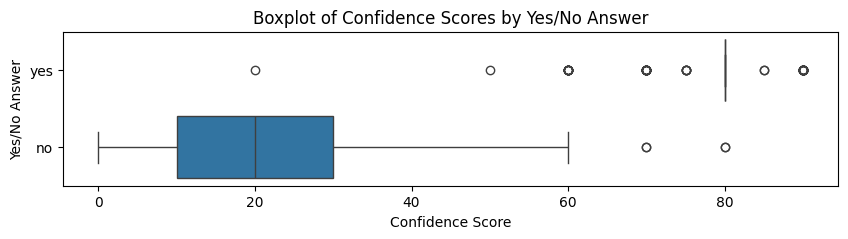

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the confidence score column to numeric if it is not already
df['Self Care Confidence'] = pd.to_numeric(df['Self Care Confidence'], errors='coerce')

# Plot the boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x='Self Care Confidence', y='Self Care', data=df)
plt.xlabel("Confidence Score")
plt.ylabel("Yes/No Answer")
plt.title("Boxplot of Confidence Scores by Yes/No Answer")
plt.show()

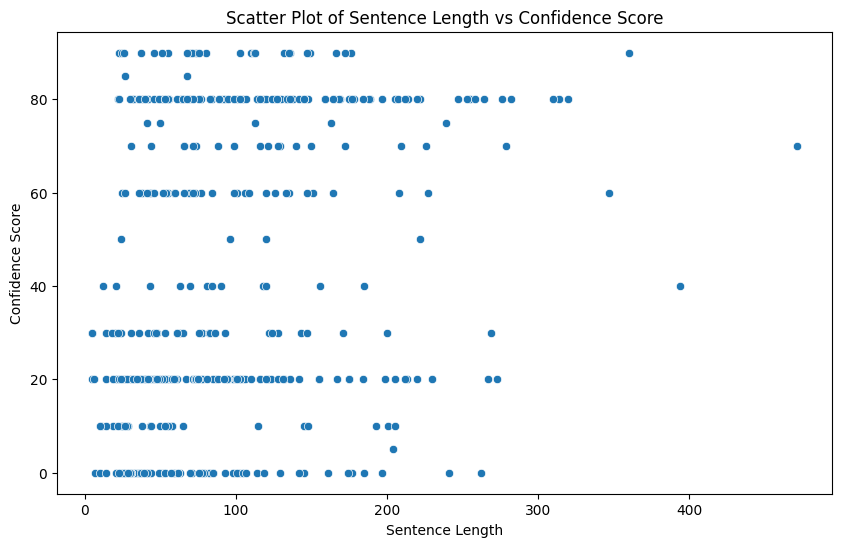

In [8]:
# Convert 'Self Care Confidence' to numeric in case it's not already
df['Self Care Confidence'] = pd.to_numeric(df['Self Care Confidence'], errors='coerce')

# Scatter plot to show correlation between sentence length and confidence scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentenceLength', y='Self Care Confidence', data=df)
plt.xlabel("Sentence Length")
plt.ylabel("Confidence Score")
plt.title("Scatter Plot of Sentence Length vs Confidence Score")
plt.show()

{'Minimum': 0, 'Maximum': 90, 'Median': 30.0, 'Mean': 42.03056768558952}


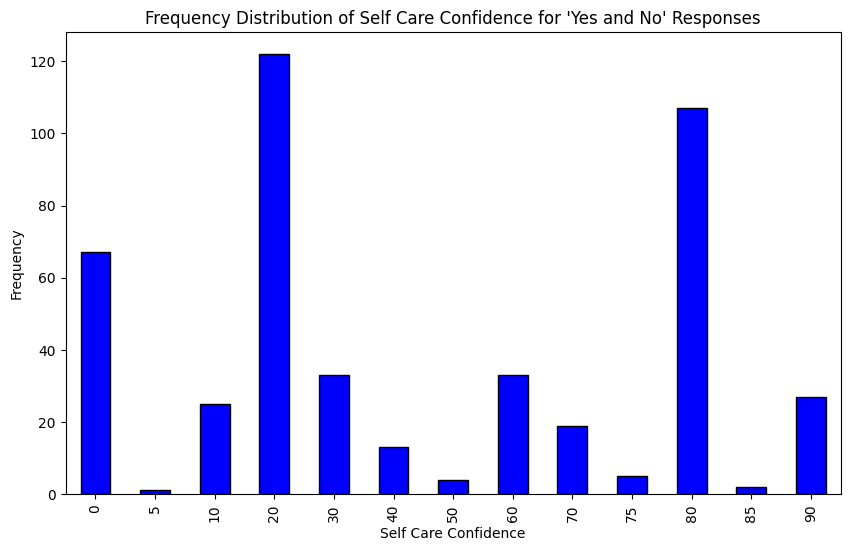

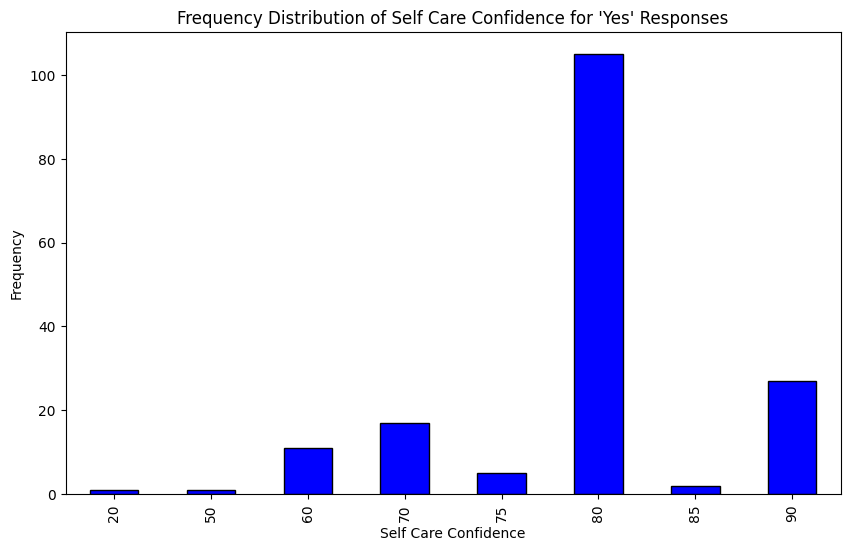

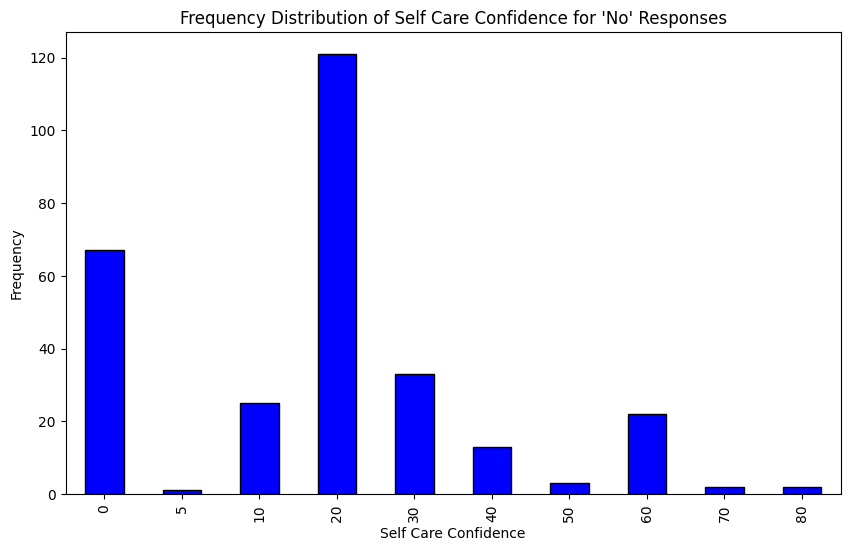

In [15]:
confidence_min = df['Self Care Confidence'].min()
confidence_max = df['Self Care Confidence'].max()
confidence_median = df['Self Care Confidence'].median()
confidence_mean = df['Self Care Confidence'].mean()

# Print calculated values
numeric_values = {
    "Minimum": confidence_min,
    "Maximum": confidence_max,
    "Median": confidence_median,
    "Mean": confidence_mean
}

print(numeric_values)

# Plotting histograms for the Self Care column
# Frequency distribution of total count (both 'yes' and 'no')
plt.figure(figsize=(10, 6))
confidence_frequencies = df['Self Care Confidence'].value_counts().sort_index()
confidence_frequencies.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Frequency Distribution of Self Care Confidence for 'Yes and No' Responses")
plt.xlabel("Self Care Confidence")
plt.ylabel("Frequency")
plt.show()

# Frequency distribution of 'yes' responses
plt.figure(figsize=(10, 6))
yes_confidence_frequencies = df[df['Self Care'] == 'yes']['Self Care Confidence'].value_counts().sort_index()
yes_confidence_frequencies.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Frequency Distribution of Self Care Confidence for 'Yes' Responses")
plt.xlabel("Self Care Confidence")
plt.ylabel("Frequency")
plt.show()

# Frequency distribution of 'no' responses
plt.figure(figsize=(10, 6))
no_confidence_frequencies = df[df['Self Care'] == 'no']['Self Care Confidence'].value_counts().sort_index()
no_confidence_frequencies.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Frequency Distribution of Self Care Confidence for 'No' Responses")
plt.xlabel("Self Care Confidence")
plt.ylabel("Frequency")
plt.show()